## Customer Segmentation Analysis Overview

1. **Import Required Libraries**  
   We import essential Python libraries such as `pandas`, `numpy`, `seaborn`, and `matplotlib` for data manipulation and visualization. For model development, we use `scikit-learn`.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Set style for the plots
sns.set(style='whitegrid')

In [3]:
%conda install pandas numpy matplotlib seaborn scikit-learn -y

Retrieving notices: ...working... ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [4]:
%conda install matplotlib -y

Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /workspaces/Customer-Segmentation-Decision-Tree/.conda

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h5eee18b_8          18 KB
    brotli-bin-1.0.9           |       h5eee18b_8          19 KB
    contourpy-1.2.0            |  py311hdb19cb5_0         263 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    cyrus-sasl-2.1.28          |       h52b45da_1         237 KB
    dbus-1.13.18               |       hb2f20db_0         504 KB
    expat-2.6.3                |       h6a678d5_0         176 KB
    fontconfig-2.14.1          |       h55d465d_3         281 KB
    fonttools-4.51.0           |  py311h5eee18b_0         3.0 MB
    freetype-2.12.1            |       h4a9f257_0         6

In [2]:
%conda install pandas -y

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /workspaces/Customer-Segmentation-Decision-Tree/.conda

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    bottleneck-1.3.7           |  py311hf4808d0_0         145 KB
    libgfortran-ng-11.2.0      |       h00389a5_1          20 KB
    libgfortran5-11.2.0        |       h1234567_1         2.0 MB
    libopenblas-0.3.21         |       h043d6bf_0         5.4 MB
    numexpr-2.8.7              |  py311h812550d_0         167 KB
    numpy-1.26.4               |  py311h24aa872_0          10 KB
    numpy-base-1.26.4          |  py311hbfb1bba_0         8.3 MB
    pandas-2.2.2               |  py311ha02d727_0        15.7 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_

In [13]:
%conda install openpyxl -y


Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /workspaces/Customer-Segmentation-Decision-Tree/.conda

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.1.0           |  py311h06a4308_0          11 KB
    openpyxl-3.1.5             |  py311h5eee18b_0         731 KB
    ------------------------------------------------------------
                                           Total:         742 KB

The following NEW packages will be INSTALLED:

  et_xmlfile         pkgs/main/linux-64::et_xmlfile-1.1.0-py311h06a4308_0 
  openpyxl           pkgs/main/linux-64::openpyxl-3.1.5-py311h5eee18b_0 



openpyxl-3.1.5       | 731 KB    |                                       |   0% 
openpyxl-3.1.5       | 731 KB    | ##################################### | 100% 
et_xmlfile

2. **Load the Dataset**  
   The dataset is sourced from a CSV file. We load it into a DataFrame to inspect the first few rows and understand the structure of the data.

In [4]:
# Load the dataset
data = pd.read_excel("bodyPerformance.xlsx")

# Display the first few rows
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
data.shape

(13393, 12)

3. **Exploratory Data Analysis (EDA)**  
   - Check for **missing values** and **summary statistics** to identify any data inconsistencies.  
   - Use visualizations (like histograms) to explore the distribution of key features (e.g., Age).  
   - Identify **relationships and patterns** between variables to see which features might influence the target variable.

Missing values:
 age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64
Summary statistics:
                 age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000 

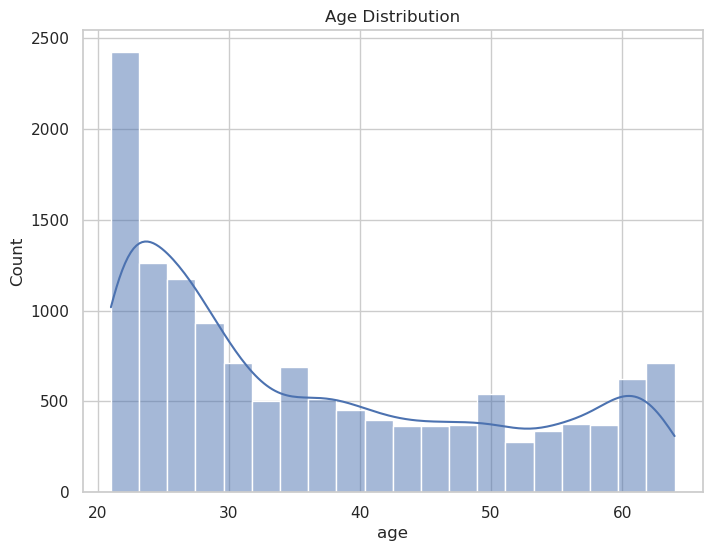

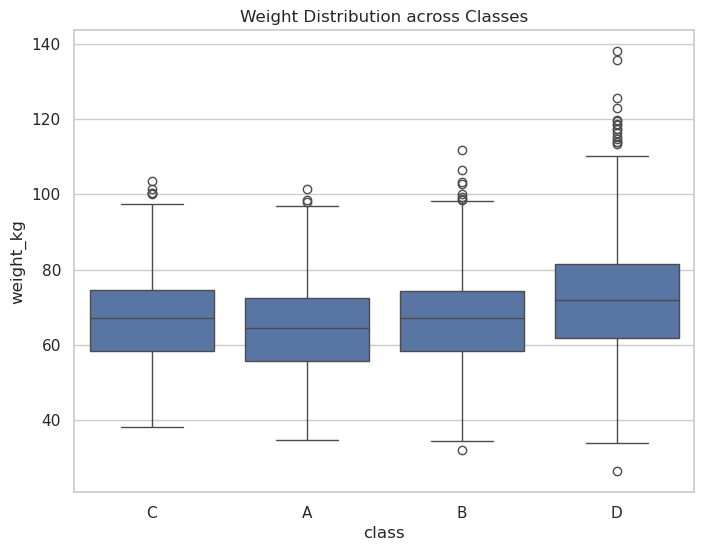

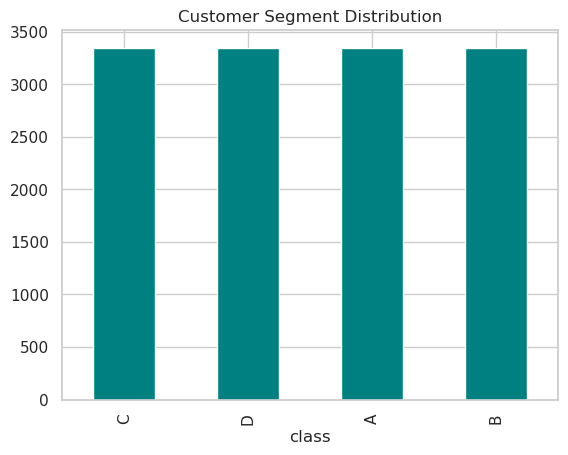

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Summary statistics
print("Summary statistics:\n", data.describe())

# Plot distributions
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)  # Change 'Age' to 'age'
plt.title('Age Distribution')
plt.show()

# Income boxplot by Segment (You should ensure that 'Segment' and 'Income' are in your DataFrame)
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='weight_kg', data=data)  # Assuming you're using 'class' instead of 'Segment'
plt.title('Weight Distribution across Classes')
plt.show()

# Bar chart of customer segments (using 'class' instead of 'Segment')
data['class'].value_counts().plot(kind='bar', color='teal')
plt.title('Customer Segment Distribution')
plt.show()

4. **Data Preprocessing**  
   - Encode categorical variables using **Label Encoding** to convert them into numerical values.  
   - Separate the data into **features (X)** and **target variable (y)**.  
   - Split the dataset into **training and testing sets** using an 80:20 ratio to prevent data leakage.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label encode the target variable 'class'
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  

# Define the features (X) and target (y)
X = data.drop('class', axis=1)  # Drop 'class' 
y = data['class']  # Use 'class' for the target variable

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# At this point, no need to encode 'Segment' since it seems to be non-existent or unnecessary
# If you still need to analyze or encode other categorical variables, do so before this point


X_train shape: (10714, 11)
X_test shape: (2679, 11)
y_train shape: (10714,)
y_test shape: (2679,)


5. **Model Training and Fitting**  
   - Use a **Decision Tree Classifier** since it is well-suited for segmentation tasks.  
   - Tune the hyperparameters like `max_depth` to control overfitting and ensure the model generalizes well.  
   - Train the model using the training data.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming 'data' is your DataFrame with 'class' as the target variable
# Label encode the target variable 'class'
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  

# Define the features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# One-Hot Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check predictions or evaluate model

6. **Model Evaluation**  
   - Predict the target variable using the **test dataset**.  
   - Evaluate the model's performance using **accuracy, confusion matrix, and classification report** to assess precision, recall, and F1-score.  
   - Generate a **ROC curve** to analyze the trade-off between true positive and false positive rates.

Model Accuracy: 0.56
Confusion Matrix:
 [[416 269   0   0]
 [141 460  38  23]
 [ 95 290 218  47]
 [ 34 137  95 416]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61       685
           1       0.40      0.69      0.51       662
           2       0.62      0.34      0.44       650
           3       0.86      0.61      0.71       682

    accuracy                           0.56      2679
   macro avg       0.62      0.56      0.57      2679
weighted avg       0.62      0.56      0.57      2679



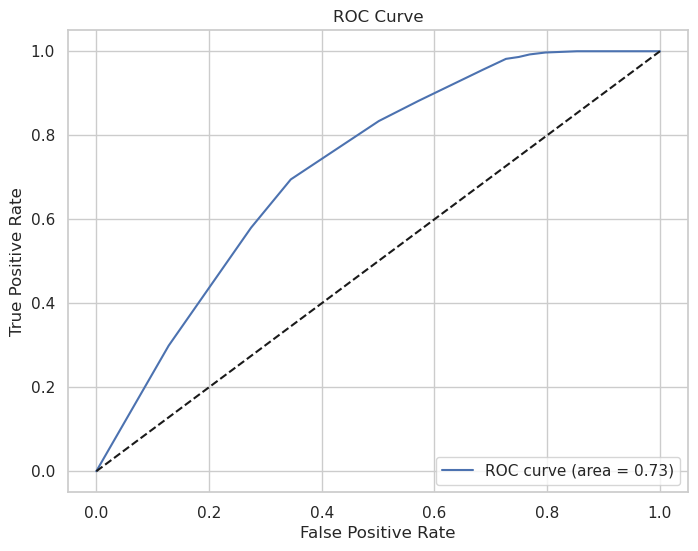

In [9]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

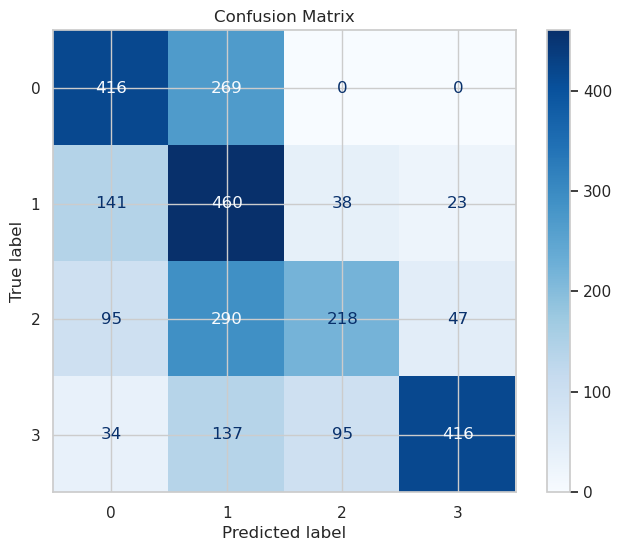

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained model
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a chart
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

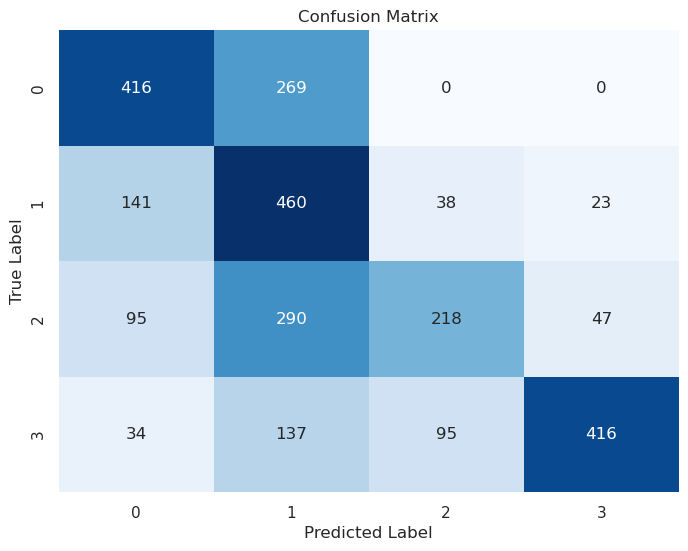

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions from the model
y_pred = model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and axes
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adjust tick marks and labels to match the class names (0, 1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=[0, 1, 2, 3])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=[0, 1, 2, 3])

plt.show()

7. **Visualize the Decision Tree**  
   - Plot the **decision tree structure** to gain insights into how the model makes predictions and performs segmentation.  
   - The visualization helps understand which features are most significant in segmenting the customers.

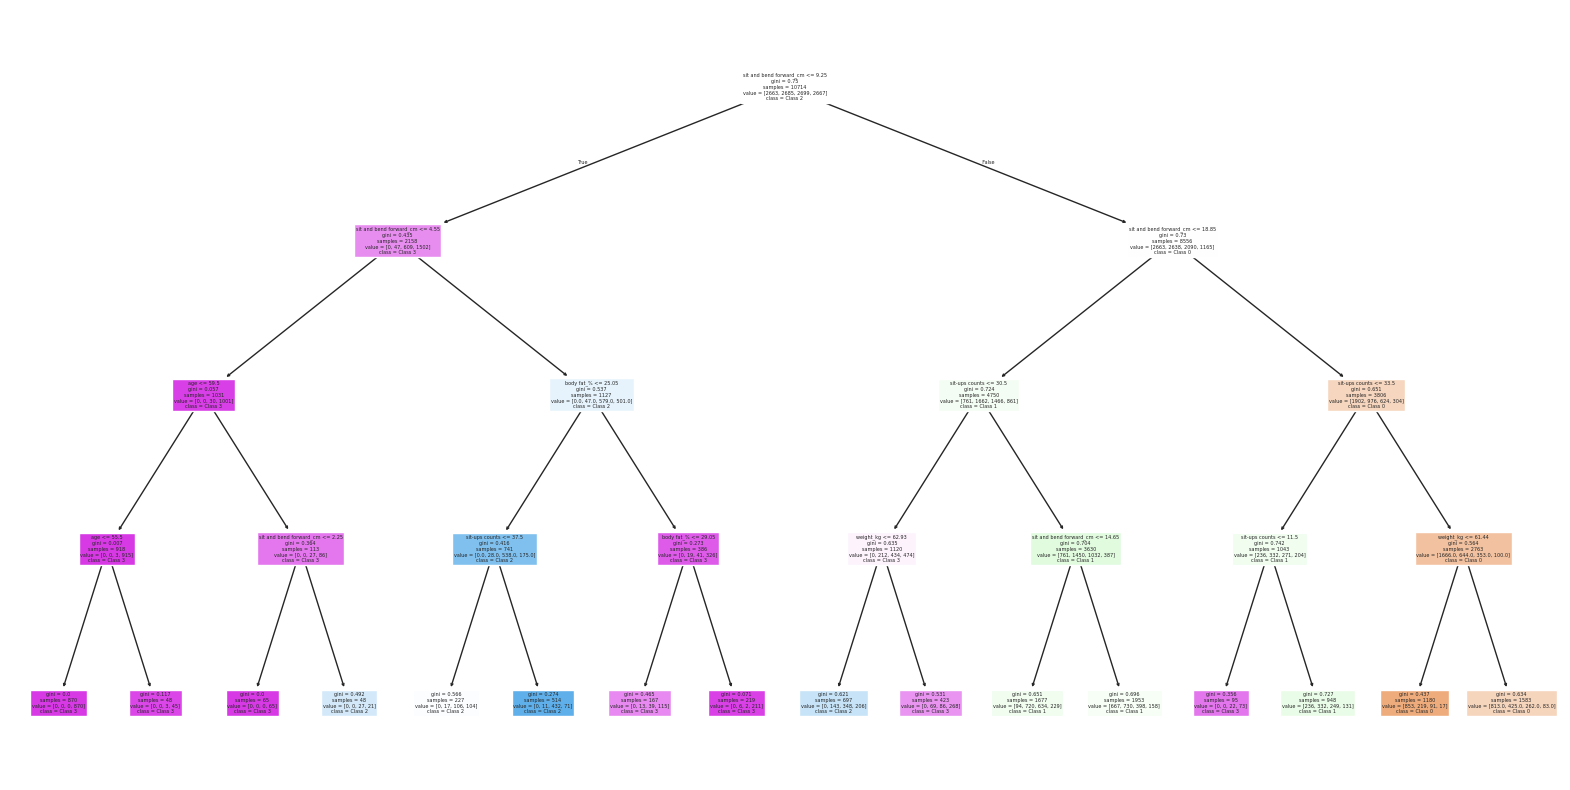

In [12]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'], filled=True)
plt.show()

8. **Saving the Model (Optional)**  
   - Store the trained model using `joblib` or `pickle` to reuse it for future predictions without retraining.

In [13]:
import joblib

# Save the model
joblib.dump(model, 'decision_tree_model.pkl')

# To load the model later:
# model = joblib.load('decision_tree_model.pkl')

['decision_tree_model.pkl']